In [2]:
import os
import time

import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
import shutil

# kaggle原始数据集地址
original_dataset_dir = '/Users/jihaipeng/PycharmProjects/深度学习实践/深度学习实验/5实验5/dogs_cats/kaggle/train'
total_num = int(len(os.listdir(original_dataset_dir)) / 2)
random_idx = np.array(range(total_num))
np.random.shuffle(random_idx)
# 待处理的数据集地址
base_dir = '/Users/jihaipeng/PycharmProjects/深度学习实践/深度学习实验/5实验5/dogs_cats/kaggle/train'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# 训练集、测试集的划分
sub_dirs = ['train_', 'test_']
animals = ['cats', 'dogs']
train_idx = random_idx[:int(total_num * 0.9)]
test_idx = random_idx[int(total_num * 0.9):]
numbers = [train_idx, test_idx]
for idx, sub_dir in enumerate(sub_dirs):
    dir = os.path.join(base_dir, sub_dir)
    if not os.path.exists(dir):
        os.mkdir(dir)
    for animal in animals:
        animal_dir = os.path.join(dir, animal)  #
        
        if not os.path.exists(animal_dir):
            os.mkdir(animal_dir)
        fnames = [animal[:-1] + '.{}.jpg'.format(i) for i in numbers[idx]]
        for fname in fnames:
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(animal_dir, fname)
            shutil.copyfile(src, dst)

        # 验证训练集、验证集、测试集的划分的照片数目
        print(animal_dir + ' total images : %d' % (len(os.listdir(animal_dir))))

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: '/Users/jihaipeng/PycharmProjects/深度学习实践/深度学习实验/5实验5/dogs_cats/kaggle/train'

In [ ]:
"""数据准备"""
print("开始")
train_data = datasets.ImageFolder(root='././dogs_cats/kaggle/train/train/',
                                  transform=transforms.Compose(
                                      [
                                          transforms.Resize([224, 224]),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                      ]
                                  ))

开始


{'cats': 0, 'dogs': 1}
['cats', 'dogs']
0


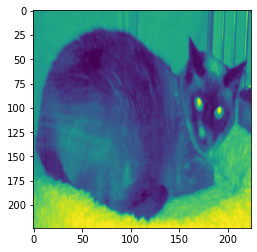

In [ ]:
print(train_data.class_to_idx)
print(train_data.classes)
img = train_data[10][0]
label = train_data[10][1]
print(label)
plt.imshow(img[0, :])
plt.show()

0


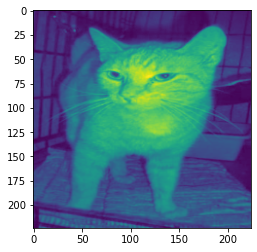

In [ ]:
test_data = datasets.ImageFolder(root='./dogs_cats/kaggle/train/test/',
                                 transform=transforms.Compose(
                                     [
                                         transforms.Resize([224, 224]),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ]
                                 ))
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=True)

img = test_data[10][0].numpy()
label = train_data[10][1]
print(label)
plt.imshow(img[0, :])
plt.show()

In [ ]:

"""采用固定值方式迁移Resnet18网络"""
net = models.resnet18(pretrained=True)
for param in net.parameters():
    # 把参数冻结住，反向传播时不修改
    param.requires_grad = False
features = net.fc.in_features
net.fc = nn.Linear(features, 2)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.fc.parameters(), lr=0.001, momentum=0.9)

In [ ]:

"""训练"""
enum_train_loader = enumerate(train_loader)
print(len(enum_train_loader))

NameError: name 'train_loader' is not defined

In [ ]:
for epoch in range(1):
    for i, data in enum_train_loader:
        x, y = data
        pred = net(x)
        loss = loss_fn(pred, y)

        opt.zero_grad()
        loss.backward()
        opt.step()
        # if i % 500 == 0:
        print(i / 250, "%")
    if epoch % 2 == 0:
        print(loss.data)

NameError: name 'enum_train_loader' is not defined

In [ ]:

"""测试"""
print("测试",time.ctime())
rights = 0
length = 0
for i, data in enumerate(test_loader):
    x, y = data

    pred = net(x)
    # print("pred: ", pred)
    # print("y: ", y)
    for j in range(len(y)):
        if pred[j][0] > 0 and y[j] == 0:
            rights += 1
        elif pred[j][1] > 0 and y[j] == 1:
            rights += 1
print("正确数:", rights, "准确率", rights / len(test_data) * 100, "%")